# Í∞úÏÑ†Îêú KMeans Íµ∞Ïßë Î∂ÑÏÑù
## Í±¥Í∞ï Ìå®ÌÑ¥ Í∑∏Î£πÌôî Î∞è ÌäπÏÑ± Î∂ÑÏÑù

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score, silhouette_samples
import warnings
warnings.filterwarnings('ignore')

# ÏãúÍ∞ÅÌôî ÏÑ§Ï†ï
plt.rcParams['font.family'] = 'AppleGothic'
plt.rcParams['axes.unicode_minus'] = False
sns.set_style('whitegrid')

print("ÎùºÏù¥Î∏åÎü¨Î¶¨ Î°úÎìú ÏôÑÎ£å")

ÎùºÏù¥Î∏åÎü¨Î¶¨ Î°úÎìú ÏôÑÎ£å


In [2]:
# Îç∞Ïù¥ÌÑ∞ Î°úÎìú Î∞è Ï†ÑÏ≤òÎ¶¨
df = pd.read_csv('./data/health_2023_cleaned_final.csv')

# Íµ∞ÏßëÎ∂ÑÏÑùÏóê ÏÇ¨Ïö©Ìï† Í±¥Í∞ïÏßÄÌëú ÏÑ†ÌÉù
cluster_features = [
    'Ïó∞Î†πÎåÄÏΩîÎìú(5ÏÑ∏Îã®ÏúÑ)', 'ÏÑ±Î≥ÑÏΩîÎìú', 'Ïã†Ïû•(5cmÎã®ÏúÑ)', 'Ï≤¥Ï§ë(5kgÎã®ÏúÑ)', 'ÌóàÎ¶¨ÎëòÎ†à',
    'ÏàòÏ∂ïÍ∏∞ÌòàÏïï', 'Ïù¥ÏôÑÍ∏∞ÌòàÏïï', 'ÏãùÏ†ÑÌòàÎãπ(Í≥µÎ≥µÌòàÎãπ)',
    'Ï¥ùÏΩúÎ†àÏä§ÌÖåÎ°§', 'HDLÏΩúÎ†àÏä§ÌÖåÎ°§', 'LDLÏΩúÎ†àÏä§ÌÖåÎ°§', 'Ìä∏Î¶¨Í∏ÄÎ¶¨ÏÑ∏ÎùºÏù¥Îìú',
    'ÌòàÏ≤≠ÏßÄÏò§Ìã∞(AST)', 'ÌòàÏ≤≠ÏßÄÌîºÌã∞(ALT)', 'Í∞êÎßàÏßÄÌã∞Ìîº',
    'ÌòàÏ≤≠ÌÅ¨Î†àÏïÑÌã∞Îãå', 'Ìù°Ïó∞ÏÉÅÌÉú', 'ÏùåÏ£ºÏó¨Î∂Ä'
]

# Í≤∞Ï∏°Ïπò Ï†úÍ±∞
df_cluster = df[cluster_features].dropna()
print(f"Íµ∞ÏßëÎ∂ÑÏÑùÏö© Îç∞Ïù¥ÌÑ∞ ÌÅ¨Í∏∞: {df_cluster.shape}")

# ÌååÏÉù Î≥ÄÏàò Ï∂îÍ∞Ä
df_cluster['BMI'] = (df.loc[df_cluster.index, 'Ï≤¥Ï§ë(5kgÎã®ÏúÑ)'] * 1.0) / ((df.loc[df_cluster.index, 'Ïã†Ïû•(5cmÎã®ÏúÑ)'] / 100) ** 2)
df_cluster['ÌóàÎ¶¨Ïã†Ïû•ÎπÑ'] = df_cluster['ÌóàÎ¶¨ÎëòÎ†à'] / df_cluster['Ïã†Ïû•(5cmÎã®ÏúÑ)']

# ÏµúÏ¢Ö ÌäπÏÑ± Î¶¨Ïä§Ìä∏
final_features = cluster_features + ['BMI', 'ÌóàÎ¶¨Ïã†Ïû•ÎπÑ']
df_cluster = df_cluster[final_features].fillna(df_cluster[final_features].mean())

print(f"ÏµúÏ¢Ö ÌäπÏÑ± Í∞úÏàò: {len(final_features)}")
print(f"ÌäπÏÑ± Î™©Î°ù: {final_features}")

Íµ∞ÏßëÎ∂ÑÏÑùÏö© Îç∞Ïù¥ÌÑ∞ ÌÅ¨Í∏∞: (332650, 18)
ÏµúÏ¢Ö ÌäπÏÑ± Í∞úÏàò: 20
ÌäπÏÑ± Î™©Î°ù: ['Ïó∞Î†πÎåÄÏΩîÎìú(5ÏÑ∏Îã®ÏúÑ)', 'ÏÑ±Î≥ÑÏΩîÎìú', 'Ïã†Ïû•(5cmÎã®ÏúÑ)', 'Ï≤¥Ï§ë(5kgÎã®ÏúÑ)', 'ÌóàÎ¶¨ÎëòÎ†à', 'ÏàòÏ∂ïÍ∏∞ÌòàÏïï', 'Ïù¥ÏôÑÍ∏∞ÌòàÏïï', 'ÏãùÏ†ÑÌòàÎãπ(Í≥µÎ≥µÌòàÎãπ)', 'Ï¥ùÏΩúÎ†àÏä§ÌÖåÎ°§', 'HDLÏΩúÎ†àÏä§ÌÖåÎ°§', 'LDLÏΩúÎ†àÏä§ÌÖåÎ°§', 'Ìä∏Î¶¨Í∏ÄÎ¶¨ÏÑ∏ÎùºÏù¥Îìú', 'ÌòàÏ≤≠ÏßÄÏò§Ìã∞(AST)', 'ÌòàÏ≤≠ÏßÄÌîºÌã∞(ALT)', 'Í∞êÎßàÏßÄÌã∞Ìîº', 'ÌòàÏ≤≠ÌÅ¨Î†àÏïÑÌã∞Îãå', 'Ìù°Ïó∞ÏÉÅÌÉú', 'ÏùåÏ£ºÏó¨Î∂Ä', 'BMI', 'ÌóàÎ¶¨Ïã†Ïû•ÎπÑ']


## 1. ÏµúÏ†Å ÌÅ¥Îü¨Ïä§ÌÑ∞ Ïàò Í≤∞Ï†ï

In [3]:
# Îç∞Ïù¥ÌÑ∞ Ï†ïÍ∑úÌôî
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_cluster)
print(f"Ï†ïÍ∑úÌôîÎêú Îç∞Ïù¥ÌÑ∞ ÌòïÌÉú: {X_scaled.shape}")

# ÏÉòÌîåÎßÅ (Í≥ÑÏÇ∞ ÏãúÍ∞Ñ Îã®Ï∂ïÏùÑ ÏúÑÌï¥)
sample_size = min(10000, len(X_scaled))
np.random.seed(42)
sample_indices = np.random.choice(len(X_scaled), sample_size, replace=False)
X_sample = X_scaled[sample_indices]
df_sample = df_cluster.iloc[sample_indices]

print(f"ÏÉòÌîåÎßÅÎêú Îç∞Ïù¥ÌÑ∞ ÌÅ¨Í∏∞: {X_sample.shape}")

Ï†ïÍ∑úÌôîÎêú Îç∞Ïù¥ÌÑ∞ ÌòïÌÉú: (332650, 20)
ÏÉòÌîåÎßÅÎêú Îç∞Ïù¥ÌÑ∞ ÌÅ¨Í∏∞: (10000, 20)


ÌÅ¥Îü¨Ïä§ÌÑ∞ ÏàòÎ≥Ñ ÌèâÍ∞Ä ÏßÑÌñâ Ï§ë...
k=2: Inertia=180395.83, Silhouette Score=0.167
k=2: Inertia=180395.83, Silhouette Score=0.167
k=3: Inertia=167400.86, Silhouette Score=0.168
k=3: Inertia=167400.86, Silhouette Score=0.168
k=4: Inertia=156876.54, Silhouette Score=0.125
k=4: Inertia=156876.54, Silhouette Score=0.125
k=5: Inertia=147784.39, Silhouette Score=0.120
k=5: Inertia=147784.39, Silhouette Score=0.120
k=6: Inertia=138356.39, Silhouette Score=0.114
k=6: Inertia=138356.39, Silhouette Score=0.114
k=7: Inertia=132173.58, Silhouette Score=0.117
k=7: Inertia=132173.58, Silhouette Score=0.117
k=8: Inertia=128416.69, Silhouette Score=0.110
k=8: Inertia=128416.69, Silhouette Score=0.110
k=9: Inertia=124082.01, Silhouette Score=0.101
k=9: Inertia=124082.01, Silhouette Score=0.101
k=10: Inertia=120820.22, Silhouette Score=0.104
k=10: Inertia=120820.22, Silhouette Score=0.104


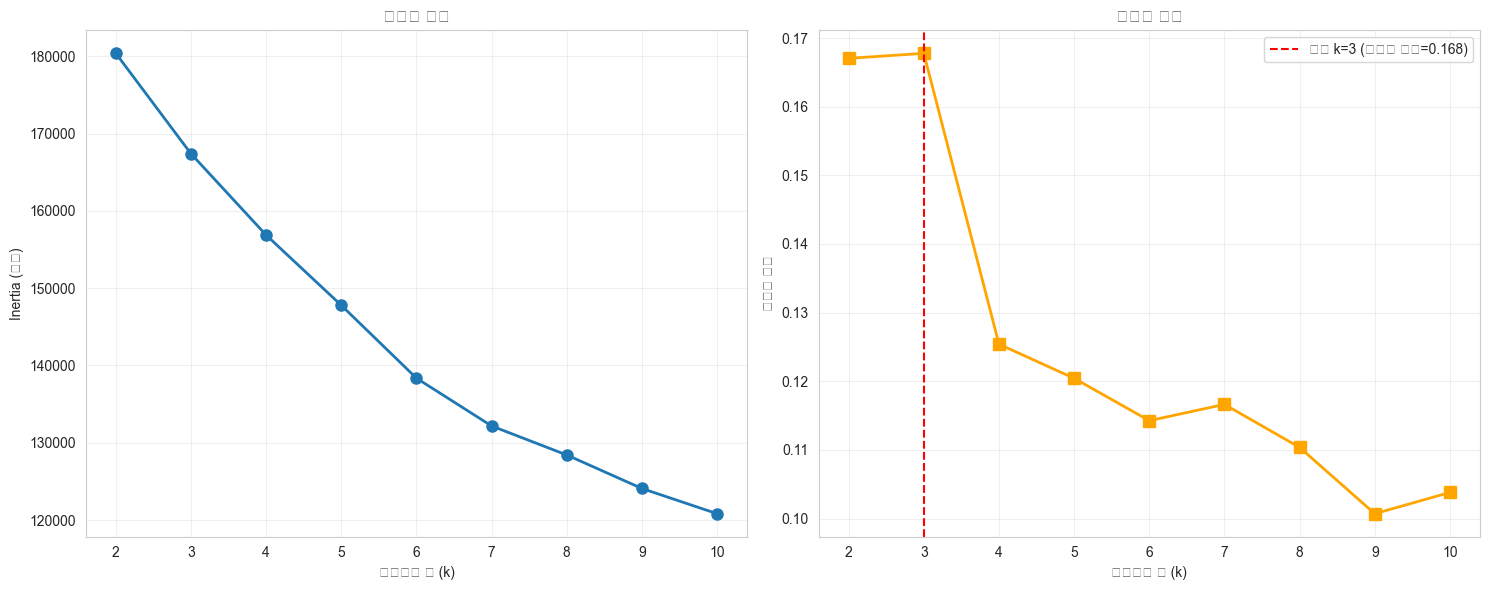


ÏµúÏ†Å ÌÅ¥Îü¨Ïä§ÌÑ∞ Ïàò: 3
ÏµúÍ≥† Ïã§Î£®Ïó£ Ï†êÏàò: 0.168


In [4]:
# ÏóòÎ≥¥Ïö∞ Î∞©Î≤ïÍ≥º Ïã§Î£®Ïó£ Î∂ÑÏÑùÏúºÎ°ú ÏµúÏ†Å ÌÅ¥Îü¨Ïä§ÌÑ∞ Ïàò Í≤∞Ï†ï
k_range = range(2, 11)
inertias = []
silhouette_scores = []

print("ÌÅ¥Îü¨Ïä§ÌÑ∞ ÏàòÎ≥Ñ ÌèâÍ∞Ä ÏßÑÌñâ Ï§ë...")
for k in k_range:
    # KMeans Ïã§Ìñâ
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    cluster_labels = kmeans.fit_predict(X_sample)
    
    # ÌèâÍ∞Ä ÏßÄÌëú Í≥ÑÏÇ∞
    inertias.append(kmeans.inertia_)
    silhouette_avg = silhouette_score(X_sample, cluster_labels)
    silhouette_scores.append(silhouette_avg)
    
    print(f"k={k}: Inertia={kmeans.inertia_:.2f}, Silhouette Score={silhouette_avg:.3f}")

# Í≤∞Í≥º ÏãúÍ∞ÅÌôî
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# ÏóòÎ≥¥Ïö∞ Î∞©Î≤ï
axes[0].plot(k_range, inertias, marker='o', linewidth=2, markersize=8)
axes[0].set_xlabel('ÌÅ¥Îü¨Ïä§ÌÑ∞ Ïàò (k)')
axes[0].set_ylabel('Inertia (Í¥ÄÏÑ±)')
axes[0].set_title('ÏóòÎ≥¥Ïö∞ Î∞©Î≤ï')
axes[0].grid(True, alpha=0.3)

# Ïã§Î£®Ïó£ Ï†êÏàò
axes[1].plot(k_range, silhouette_scores, marker='s', linewidth=2, markersize=8, color='orange')
axes[1].set_xlabel('ÌÅ¥Îü¨Ïä§ÌÑ∞ Ïàò (k)')
axes[1].set_ylabel('Ïã§Î£®Ïó£ Ï†êÏàò')
axes[1].set_title('Ïã§Î£®Ïó£ Î∂ÑÏÑù')
axes[1].grid(True, alpha=0.3)

# ÏµúÏ†Å k ÌëúÏãú
optimal_k = k_range[np.argmax(silhouette_scores)]
axes[1].axvline(x=optimal_k, color='red', linestyle='--', 
               label=f'ÏµúÏ†Å k={optimal_k} (Ïã§Î£®Ïó£ Ï†êÏàò={max(silhouette_scores):.3f})')
axes[1].legend()

plt.tight_layout()
plt.savefig('./plots/optimal_clusters_analysis.png', dpi=300, bbox_inches='tight')
plt.show()

print(f"\nÏµúÏ†Å ÌÅ¥Îü¨Ïä§ÌÑ∞ Ïàò: {optimal_k}")
print(f"ÏµúÍ≥† Ïã§Î£®Ïó£ Ï†êÏàò: {max(silhouette_scores):.3f}")

## 2. ÏµúÏ¢Ö Íµ∞ÏßëÎ∂ÑÏÑù ÏàòÌñâ

In [5]:
# ÏµúÏ†Å ÌÅ¥Îü¨Ïä§ÌÑ∞ ÏàòÎ°ú ÏµúÏ¢Ö Íµ∞ÏßëÎ∂ÑÏÑù ÏàòÌñâ
final_kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
cluster_labels = final_kmeans.fit_predict(X_sample)

# Í≤∞Í≥ºÎ•º Îç∞Ïù¥ÌÑ∞ÌîÑÎ†àÏûÑÏóê Ï∂îÍ∞Ä
df_clustered = df_sample.copy()
df_clustered['ÌÅ¥Îü¨Ïä§ÌÑ∞'] = cluster_labels

print(f"ÌÅ¥Îü¨Ïä§ÌÑ∞Î≥Ñ Îç∞Ïù¥ÌÑ∞ Î∂ÑÌè¨:")
cluster_counts = pd.Series(cluster_labels).value_counts().sort_index()
for cluster_id, count in cluster_counts.items():
    percentage = count / len(cluster_labels) * 100
    print(f"ÌÅ¥Îü¨Ïä§ÌÑ∞ {cluster_id}: {count:,}Î™Ö ({percentage:.1f}%)")

# Ïã§Î£®Ïó£ Î∂ÑÏÑù
silhouette_avg = silhouette_score(X_sample, cluster_labels)
sample_silhouette_values = silhouette_samples(X_sample, cluster_labels)

print(f"\nÌèâÍ∑† Ïã§Î£®Ïó£ Ï†êÏàò: {silhouette_avg:.3f}")

ÌÅ¥Îü¨Ïä§ÌÑ∞Î≥Ñ Îç∞Ïù¥ÌÑ∞ Î∂ÑÌè¨:
ÌÅ¥Îü¨Ïä§ÌÑ∞ 0: 5,056Î™Ö (50.6%)
ÌÅ¥Îü¨Ïä§ÌÑ∞ 1: 4,939Î™Ö (49.4%)
ÌÅ¥Îü¨Ïä§ÌÑ∞ 2: 5Î™Ö (0.1%)

ÌèâÍ∑† Ïã§Î£®Ïó£ Ï†êÏàò: 0.168

ÌèâÍ∑† Ïã§Î£®Ïó£ Ï†êÏàò: 0.168


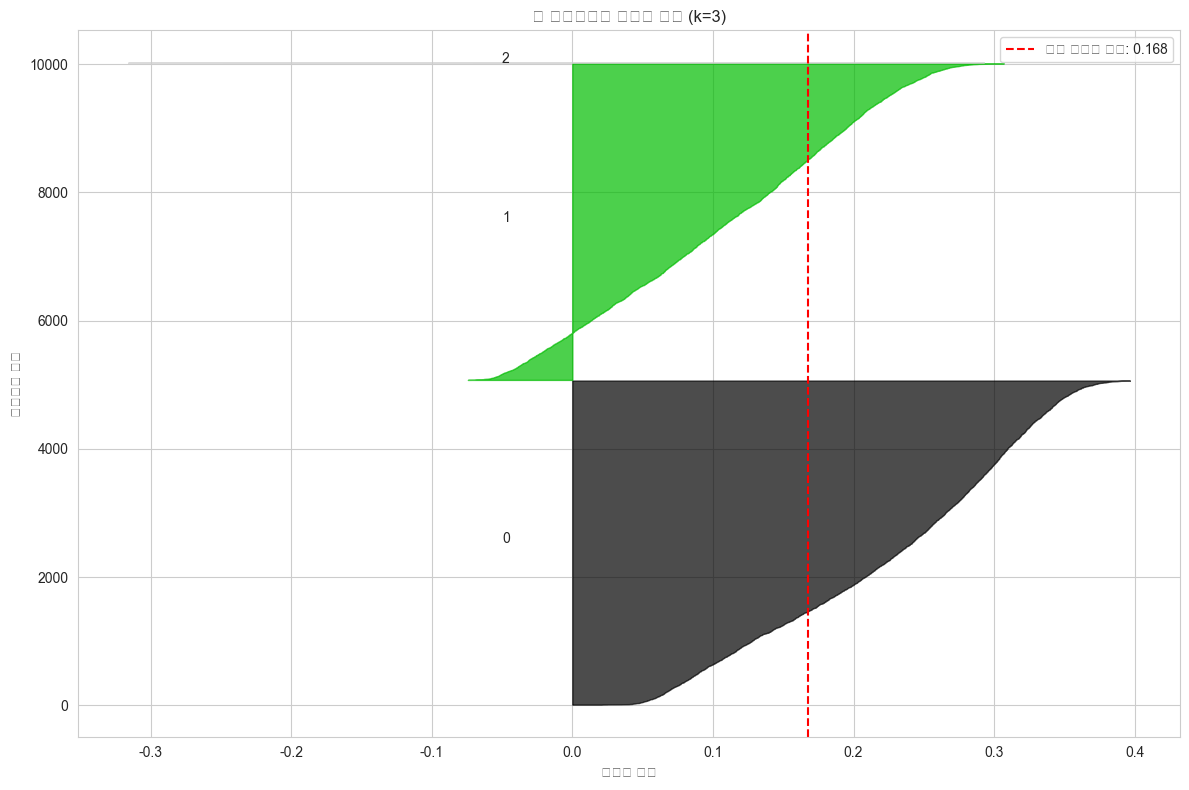

In [6]:
# Ïã§Î£®Ïó£ ÌîåÎ°Ø
fig, ax = plt.subplots(1, 1, figsize=(12, 8))

y_lower = 10
colors = plt.cm.nipy_spectral(np.linspace(0, 1, optimal_k))

for i in range(optimal_k):
    # iÎ≤àÏß∏ ÌÅ¥Îü¨Ïä§ÌÑ∞Ïùò Ïã§Î£®Ïó£ Ï†êÏàòÎì§
    ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
    ith_cluster_silhouette_values.sort()
    
    size_cluster_i = ith_cluster_silhouette_values.shape[0]
    y_upper = y_lower + size_cluster_i
    
    color = colors[i]
    ax.fill_betweenx(np.arange(y_lower, y_upper),
                     0, ith_cluster_silhouette_values,
                     facecolor=color, edgecolor=color, alpha=0.7)
    
    # ÌÅ¥Îü¨Ïä§ÌÑ∞ ÎùºÎ≤® ÌëúÏãú
    ax.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
    y_lower = y_upper + 10

ax.set_xlabel('Ïã§Î£®Ïó£ Í≥ÑÏàò')
ax.set_ylabel('ÌÅ¥Îü¨Ïä§ÌÑ∞ ÎùºÎ≤®')
ax.set_title(f'Í∞Å ÌÅ¥Îü¨Ïä§ÌÑ∞Î≥Ñ Ïã§Î£®Ïó£ Î∂ÑÏÑù (k={optimal_k})')

# Ï†ÑÏ≤¥ ÌèâÍ∑† Ïã§Î£®Ïó£ Ï†êÏàò ÏÑ† ÌëúÏãú
ax.axvline(x=silhouette_avg, color="red", linestyle="--", 
          label=f'ÌèâÍ∑† Ïã§Î£®Ïó£ Ï†êÏàò: {silhouette_avg:.3f}')
ax.legend()

plt.tight_layout()
plt.savefig('./plots/silhouette_analysis.png', dpi=300, bbox_inches='tight')
plt.show()

## 3. ÌÅ¥Îü¨Ïä§ÌÑ∞Î≥Ñ ÌäπÏÑ± Î∂ÑÏÑù

In [7]:
# ÌÅ¥Îü¨Ïä§ÌÑ∞Î≥Ñ Ï£ºÏöî Í±¥Í∞ïÏßÄÌëú ÌèâÍ∑†Í∞í Í≥ÑÏÇ∞
key_health_indicators = [
    'Ïó∞Î†πÎåÄÏΩîÎìú(5ÏÑ∏Îã®ÏúÑ)', 'ÏÑ±Î≥ÑÏΩîÎìú', 'BMI', 'ÌóàÎ¶¨ÎëòÎ†à',
    'ÏàòÏ∂ïÍ∏∞ÌòàÏïï', 'Ïù¥ÏôÑÍ∏∞ÌòàÏïï', 'ÏãùÏ†ÑÌòàÎãπ(Í≥µÎ≥µÌòàÎãπ)',
    'Ï¥ùÏΩúÎ†àÏä§ÌÖåÎ°§', 'HDLÏΩúÎ†àÏä§ÌÖåÎ°§', 'LDLÏΩúÎ†àÏä§ÌÖåÎ°§', 'Ìä∏Î¶¨Í∏ÄÎ¶¨ÏÑ∏ÎùºÏù¥Îìú',
    'Ìù°Ïó∞ÏÉÅÌÉú', 'ÏùåÏ£ºÏó¨Î∂Ä'
]

cluster_stats = df_clustered.groupby('ÌÅ¥Îü¨Ïä§ÌÑ∞')[key_health_indicators].agg(['mean', 'std']).round(2)

print("=== ÌÅ¥Îü¨Ïä§ÌÑ∞Î≥Ñ Ï£ºÏöî Í±¥Í∞ïÏßÄÌëú ÌÜµÍ≥Ñ ===")
for cluster_id in range(optimal_k):
    print(f"\n[ÌÅ¥Îü¨Ïä§ÌÑ∞ {cluster_id}] (n={cluster_counts[cluster_id]:,}Î™Ö)")
    cluster_data = cluster_stats.loc[cluster_id]
    
    # Ï£ºÏöî ÏßÄÌëúÎßå Ï∂úÎ†•
    important_vars = ['Ïó∞Î†πÎåÄÏΩîÎìú(5ÏÑ∏Îã®ÏúÑ)', 'BMI', 'Ï¥ùÏΩúÎ†àÏä§ÌÖåÎ°§', 'ÏàòÏ∂ïÍ∏∞ÌòàÏïï', 'ÏãùÏ†ÑÌòàÎãπ(Í≥µÎ≥µÌòàÎãπ)']
    for var in important_vars:
        mean_val = cluster_data[(var, 'mean')]
        std_val = cluster_data[(var, 'std')]
        print(f"  {var}: {mean_val:.1f} ¬± {std_val:.1f}")

# ÏÉÅÏÑ∏ ÌÜµÍ≥ÑÌëú Ï†ÄÏû•
cluster_stats.to_csv('./plots/cluster_statistics.csv')
print("\nÏÉÅÏÑ∏ ÌÜµÍ≥ÑÌëúÍ∞Ä './plots/cluster_statistics.csv'Ïóê Ï†ÄÏû•ÎêòÏóàÏäµÎãàÎã§.")

=== ÌÅ¥Îü¨Ïä§ÌÑ∞Î≥Ñ Ï£ºÏöî Í±¥Í∞ïÏßÄÌëú ÌÜµÍ≥Ñ ===

[ÌÅ¥Îü¨Ïä§ÌÑ∞ 0] (n=5,056Î™Ö)
  Ïó∞Î†πÎåÄÏΩîÎìú(5ÏÑ∏Îã®ÏúÑ): 12.2 ¬± 2.6
  BMI: 22.5 ¬± 3.0
  Ï¥ùÏΩúÎ†àÏä§ÌÖåÎ°§: 197.2 ¬± 41.1
  ÏàòÏ∂ïÍ∏∞ÌòàÏïï: 122.1 ¬± 15.0
  ÏãùÏ†ÑÌòàÎãπ(Í≥µÎ≥µÌòàÎãπ): 98.8 ¬± 20.0

[ÌÅ¥Îü¨Ïä§ÌÑ∞ 1] (n=4,939Î™Ö)
  Ïó∞Î†πÎåÄÏΩîÎìú(5ÏÑ∏Îã®ÏúÑ): 10.6 ¬± 2.9
  BMI: 26.1 ¬± 3.6
  Ï¥ùÏΩúÎ†àÏä§ÌÖåÎ°§: 193.5 ¬± 42.4
  ÏàòÏ∂ïÍ∏∞ÌòàÏïï: 127.1 ¬± 13.6
  ÏãùÏ†ÑÌòàÎãπ(Í≥µÎ≥µÌòàÎãπ): 105.5 ¬± 26.3

[ÌÅ¥Îü¨Ïä§ÌÑ∞ 2] (n=5Î™Ö)
  Ïó∞Î†πÎåÄÏΩîÎìú(5ÏÑ∏Îã®ÏúÑ): 12.2 ¬± 3.1
  BMI: 22.8 ¬± 2.5
  Ï¥ùÏΩúÎ†àÏä§ÌÖåÎ°§: 261.6 ¬± 211.9
  ÏàòÏ∂ïÍ∏∞ÌòàÏïï: 123.2 ¬± 10.8
  ÏãùÏ†ÑÌòàÎãπ(Í≥µÎ≥µÌòàÎãπ): 114.0 ¬± 29.6

ÏÉÅÏÑ∏ ÌÜµÍ≥ÑÌëúÍ∞Ä './plots/cluster_statistics.csv'Ïóê Ï†ÄÏû•ÎêòÏóàÏäµÎãàÎã§.


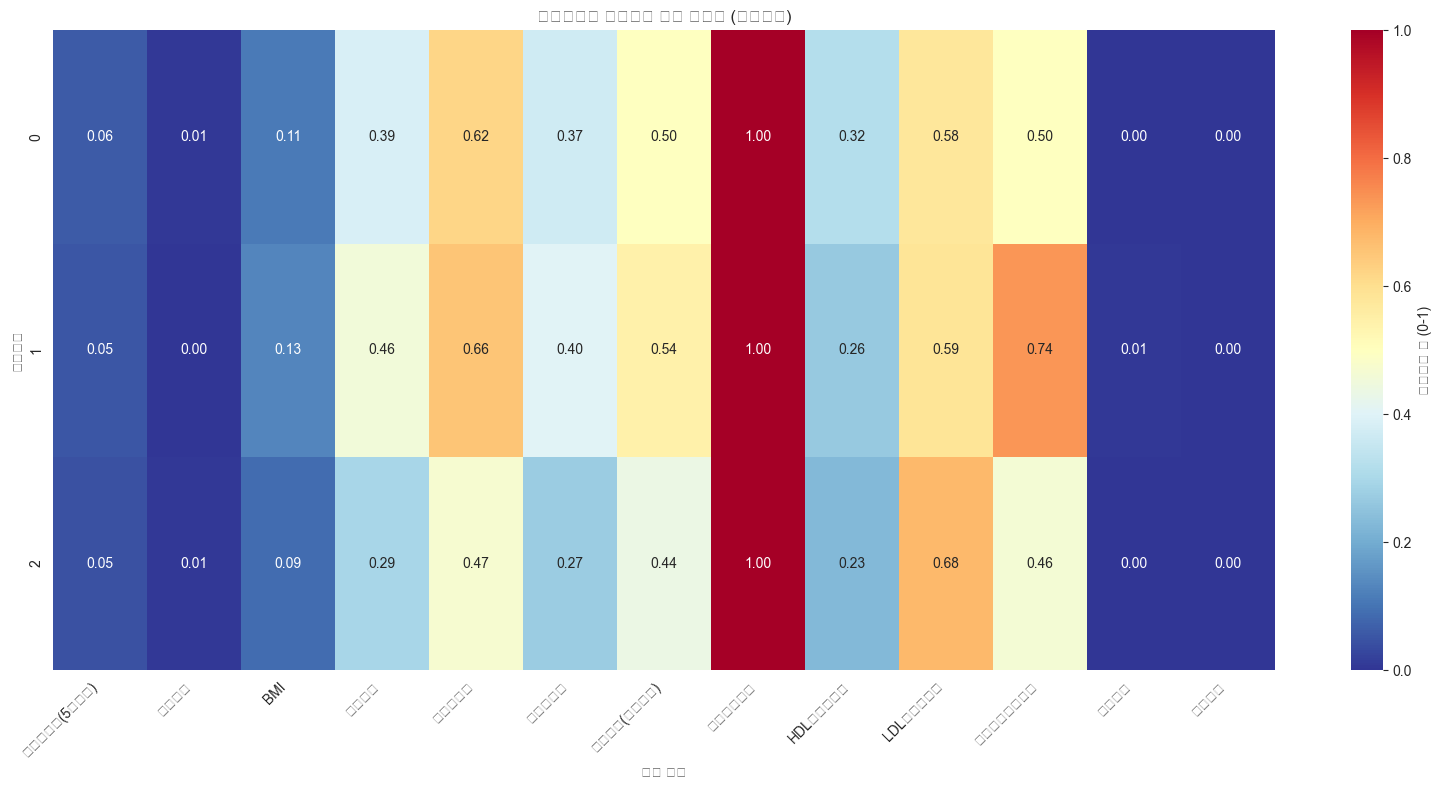

In [8]:
# ÌÅ¥Îü¨Ïä§ÌÑ∞Î≥Ñ ÌäπÏÑ± ÌûàÌä∏Îßµ
cluster_means = df_clustered.groupby('ÌÅ¥Îü¨Ïä§ÌÑ∞')[key_health_indicators].mean()

# Ï†ïÍ∑úÌôî (0-1 Ïä§ÏºÄÏùºÎßÅ)
from sklearn.preprocessing import MinMaxScaler
scaler_viz = MinMaxScaler()
cluster_means_normalized = pd.DataFrame(
    scaler_viz.fit_transform(cluster_means.T).T,
    index=cluster_means.index,
    columns=cluster_means.columns
)

plt.figure(figsize=(16, 8))
sns.heatmap(cluster_means_normalized, 
            annot=True, 
            cmap='RdYlBu_r', 
            fmt='.2f',
            cbar_kws={'label': 'Ï†ïÍ∑úÌôîÎêú Í∞í (0-1)'})
plt.title('ÌÅ¥Îü¨Ïä§ÌÑ∞Î≥Ñ Í±¥Í∞ïÏßÄÌëú ÌäπÏÑ± ÌûàÌä∏Îßµ (Ï†ïÍ∑úÌôîÎê®)')
plt.xlabel('Í±¥Í∞ï ÏßÄÌëú')
plt.ylabel('ÌÅ¥Îü¨Ïä§ÌÑ∞')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.savefig('./plots/cluster_characteristics_heatmap.png', dpi=300, bbox_inches='tight')
plt.show()

## 4. ÌÅ¥Îü¨Ïä§ÌÑ∞ ÏãúÍ∞ÅÌôî

PCA Ï†ú1Ï£ºÏÑ±Î∂Ñ ÏÑ§Î™Ö Î∂ÑÏÇ∞: 0.233
PCA Ï†ú2Ï£ºÏÑ±Î∂Ñ ÏÑ§Î™Ö Î∂ÑÏÇ∞: 0.133
Ï¥ù ÏÑ§Î™Ö Î∂ÑÏÇ∞: 0.366


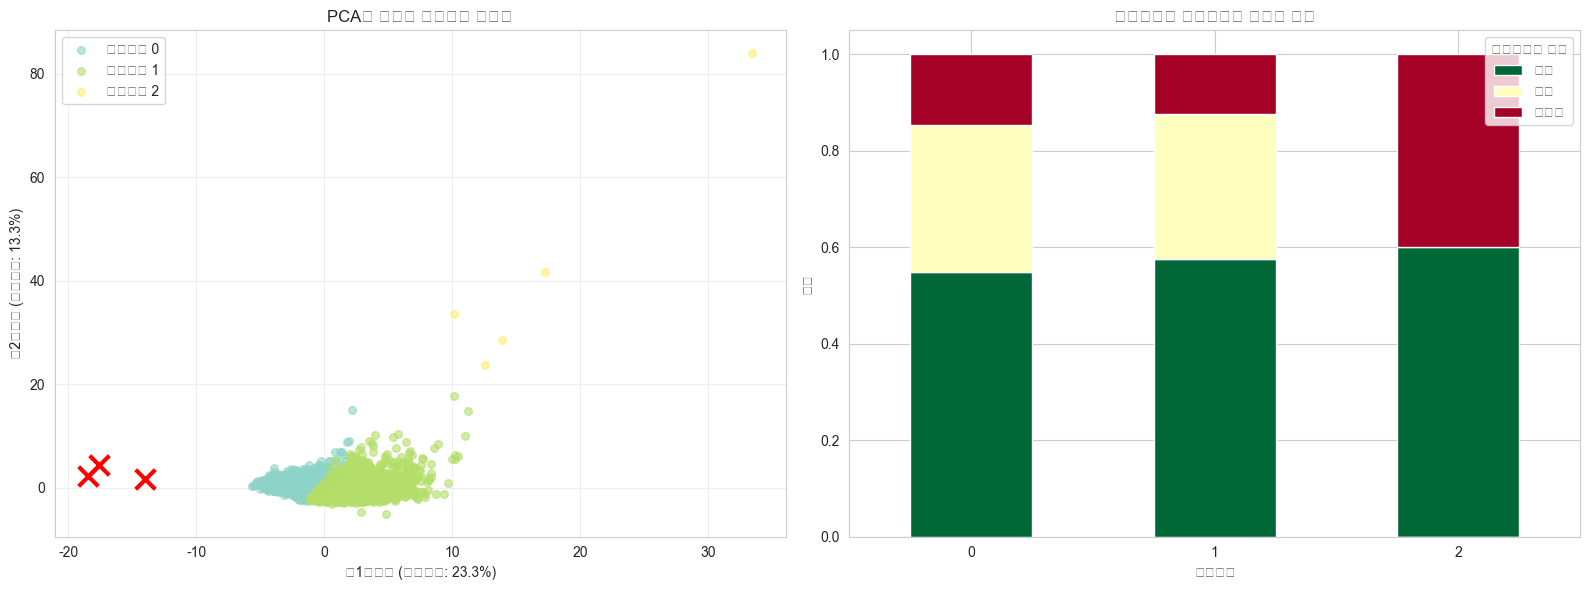

In [9]:
# PCAÎ•º ÏÇ¨Ïö©Ìïú Ï∞®Ïõê Ï∂ïÏÜå Î∞è ÏãúÍ∞ÅÌôî
pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(X_sample)

# PCA ÏÑ§Î™Ö Î∂ÑÏÇ∞ ÎπÑÏú®
explained_variance = pca.explained_variance_ratio_
print(f"PCA Ï†ú1Ï£ºÏÑ±Î∂Ñ ÏÑ§Î™Ö Î∂ÑÏÇ∞: {explained_variance[0]:.3f}")
print(f"PCA Ï†ú2Ï£ºÏÑ±Î∂Ñ ÏÑ§Î™Ö Î∂ÑÏÇ∞: {explained_variance[1]:.3f}")
print(f"Ï¥ù ÏÑ§Î™Ö Î∂ÑÏÇ∞: {sum(explained_variance):.3f}")

# ÌÅ¥Îü¨Ïä§ÌÑ∞Î≥Ñ PCA ÏãúÍ∞ÅÌôî
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# ÌÅ¥Îü¨Ïä§ÌÑ∞Î≥Ñ ÏÉâÏÉÅ Íµ¨Î∂Ñ
colors = plt.cm.Set3(np.linspace(0, 1, optimal_k))
for cluster_id in range(optimal_k):
    mask = cluster_labels == cluster_id
    axes[0].scatter(X_pca[mask, 0], X_pca[mask, 1], 
                   c=[colors[cluster_id]], 
                   label=f'ÌÅ¥Îü¨Ïä§ÌÑ∞ {cluster_id}',
                   alpha=0.6, s=30)

axes[0].set_xlabel(f'Ï†ú1Ï£ºÏÑ±Î∂Ñ (ÏÑ§Î™ÖÎ∂ÑÏÇ∞: {explained_variance[0]:.1%})')
axes[0].set_ylabel(f'Ï†ú2Ï£ºÏÑ±Î∂Ñ (ÏÑ§Î™ÖÎ∂ÑÏÇ∞: {explained_variance[1]:.1%})')
axes[0].set_title('PCAÎ•º Ïù¥Ïö©Ìïú ÌÅ¥Îü¨Ïä§ÌÑ∞ ÏãúÍ∞ÅÌôî')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# ÌÅ¥Îü¨Ïä§ÌÑ∞ Ï§ëÏã¨Ï†ê ÌëúÏãú
centroids_pca = pca.transform(scaler.transform(pd.DataFrame(final_kmeans.cluster_centers_, columns=final_features)))
axes[0].scatter(centroids_pca[:, 0], centroids_pca[:, 1], 
               c='red', marker='x', s=200, linewidths=3, label='Ï§ëÏã¨Ï†ê')

# Ï£ºÏöî Í±¥Í∞ïÏßÄÌëúÎ≥Ñ Î∂ÑÌè¨ (Î∞ïÏä§ÌîåÎ°Ø)
df_clustered['Ï¥ùÏΩúÎ†àÏä§ÌÖåÎ°§_Í∑∏Î£π'] = pd.cut(df_clustered['Ï¥ùÏΩúÎ†àÏä§ÌÖåÎ°§'], 
                                   bins=[0, 200, 240, 1000], 
                                   labels=['Ï†ïÏÉÅ', 'Í≤ΩÍ≥Ñ', 'Í≥†ÏúÑÌóò'])

# ÌÅ¥Îü¨Ïä§ÌÑ∞Î≥Ñ ÏΩúÎ†àÏä§ÌÖåÎ°§ ÏúÑÌóòÎèÑ Î∂ÑÌè¨
crosstab = pd.crosstab(df_clustered['ÌÅ¥Îü¨Ïä§ÌÑ∞'], df_clustered['Ï¥ùÏΩúÎ†àÏä§ÌÖåÎ°§_Í∑∏Î£π'], normalize='index')
crosstab.plot(kind='bar', stacked=True, ax=axes[1], colormap='RdYlGn_r')
axes[1].set_title('ÌÅ¥Îü¨Ïä§ÌÑ∞Î≥Ñ ÏΩúÎ†àÏä§ÌÖåÎ°§ ÏúÑÌóòÎèÑ Î∂ÑÌè¨')
axes[1].set_xlabel('ÌÅ¥Îü¨Ïä§ÌÑ∞')
axes[1].set_ylabel('ÎπÑÏú®')
axes[1].legend(title='ÏΩúÎ†àÏä§ÌÖåÎ°§ ÏàòÏ§Ä')
axes[1].tick_params(axis='x', rotation=0)

plt.tight_layout()
plt.savefig('./plots/cluster_visualization_pca.png', dpi=300, bbox_inches='tight')
plt.show()

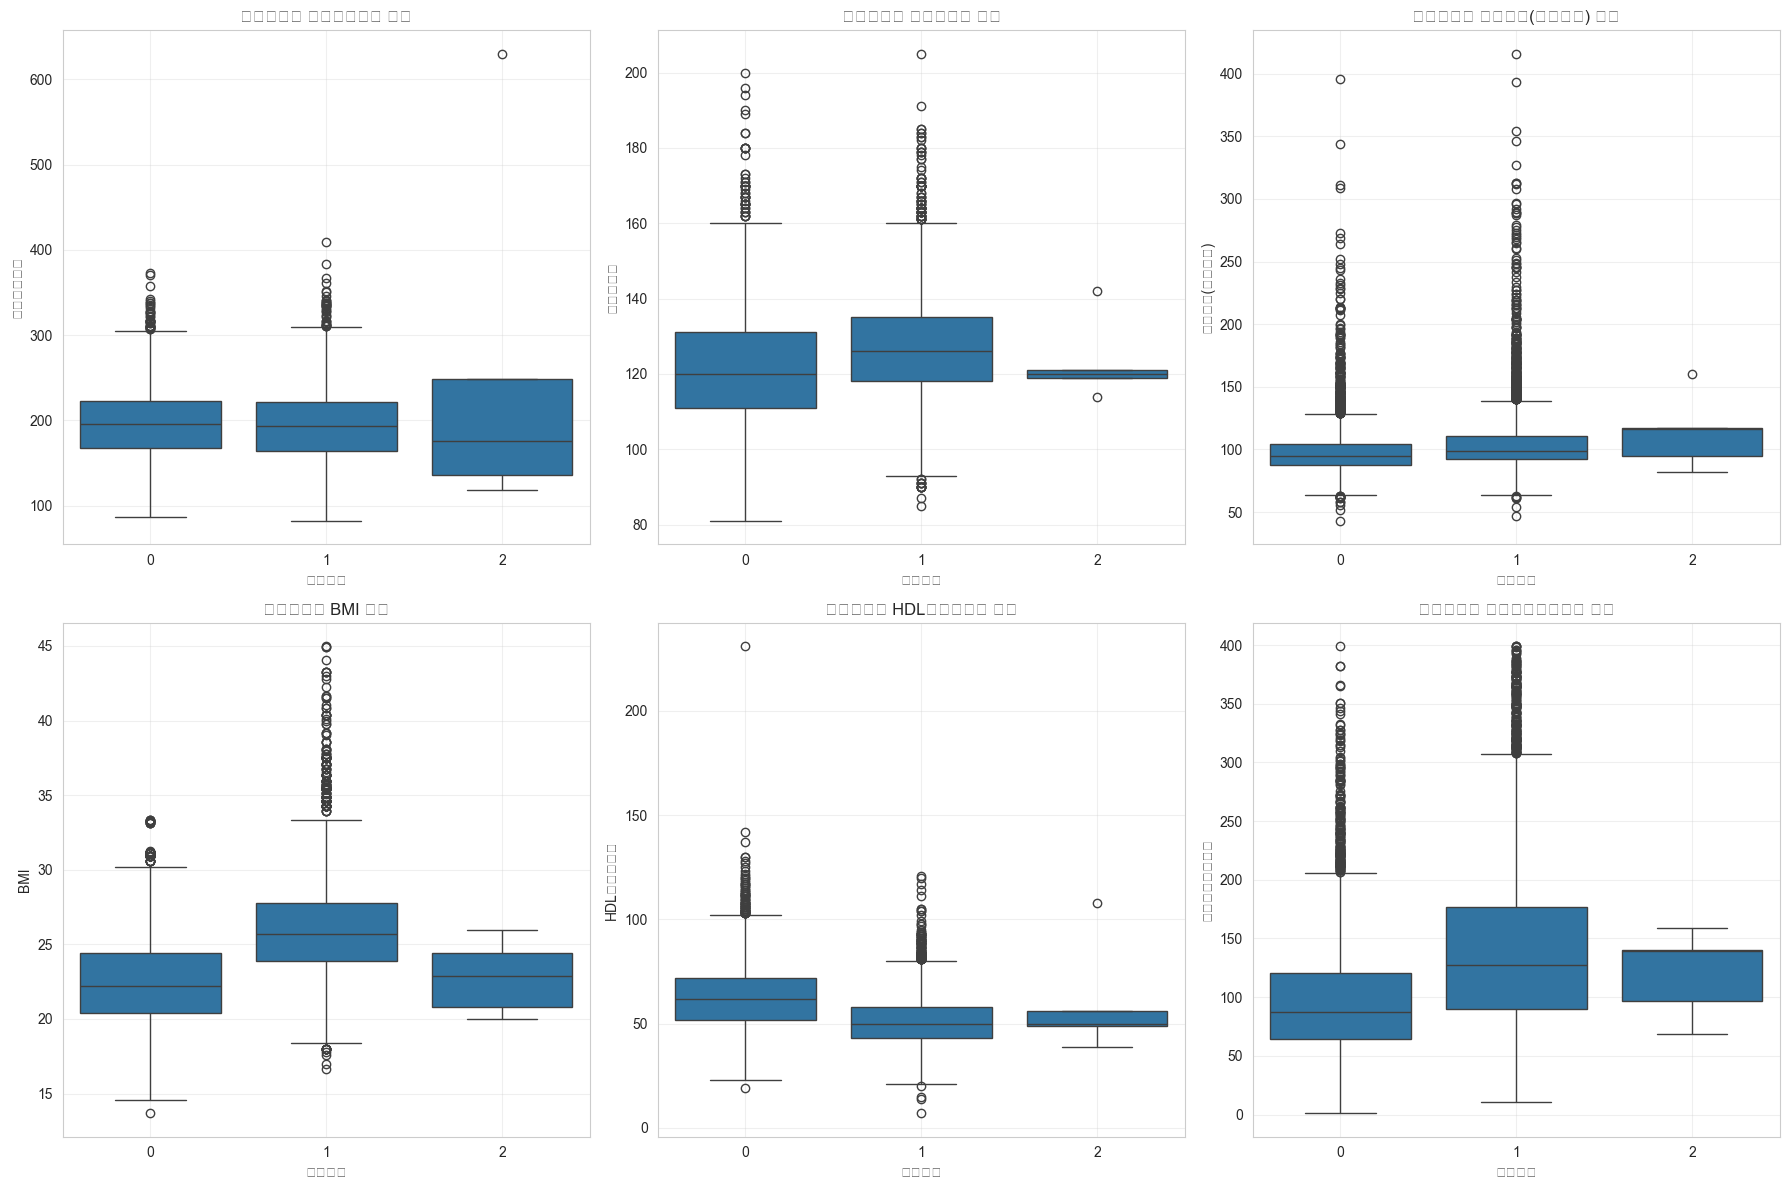

In [10]:
# ÌÅ¥Îü¨Ïä§ÌÑ∞Î≥Ñ Ï£ºÏöî Í±¥Í∞ïÏßÄÌëú Î∂ÑÌè¨ ÎπÑÍµê
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
axes = axes.flatten()

health_vars_to_plot = [
    'Ï¥ùÏΩúÎ†àÏä§ÌÖåÎ°§', 'ÏàòÏ∂ïÍ∏∞ÌòàÏïï', 'ÏãùÏ†ÑÌòàÎãπ(Í≥µÎ≥µÌòàÎãπ)', 
    'BMI', 'HDLÏΩúÎ†àÏä§ÌÖåÎ°§', 'Ìä∏Î¶¨Í∏ÄÎ¶¨ÏÑ∏ÎùºÏù¥Îìú'
]

for idx, var in enumerate(health_vars_to_plot):
    sns.boxplot(data=df_clustered, x='ÌÅ¥Îü¨Ïä§ÌÑ∞', y=var, ax=axes[idx])
    axes[idx].set_title(f'ÌÅ¥Îü¨Ïä§ÌÑ∞Î≥Ñ {var} Î∂ÑÌè¨')
    axes[idx].grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('./plots/cluster_health_indicators_distribution.png', dpi=300, bbox_inches='tight')
plt.show()

## 5. ÌÅ¥Îü¨Ïä§ÌÑ∞ ÌîÑÎ°úÌååÏùºÎßÅ

In [11]:
# ÌÅ¥Îü¨Ïä§ÌÑ∞Î≥Ñ ÌäπÏÑ± ÏöîÏïΩ Î∞è Î™ÖÎ™Ö
cluster_profiles = {}

for cluster_id in range(optimal_k):
    cluster_data = df_clustered[df_clustered['ÌÅ¥Îü¨Ïä§ÌÑ∞'] == cluster_id]
    
    profile = {
        'Ïù∏ÏõêÏàò': len(cluster_data),
        'ÎπÑÏú®': len(cluster_data) / len(df_clustered) * 100,
        'ÌèâÍ∑†Ïó∞Î†πÎåÄ': cluster_data['Ïó∞Î†πÎåÄÏΩîÎìú(5ÏÑ∏Îã®ÏúÑ)'].mean(),
        'ÎÇ®ÏÑ±ÎπÑÏú®': (cluster_data['ÏÑ±Î≥ÑÏΩîÎìú'] == 1).mean() * 100,
        'ÌèâÍ∑†BMI': cluster_data['BMI'].mean(),
        'ÌèâÍ∑†Ï¥ùÏΩúÎ†àÏä§ÌÖåÎ°§': cluster_data['Ï¥ùÏΩúÎ†àÏä§ÌÖåÎ°§'].mean(),
        'ÌèâÍ∑†ÏàòÏ∂ïÍ∏∞ÌòàÏïï': cluster_data['ÏàòÏ∂ïÍ∏∞ÌòàÏïï'].mean(),
        'ÌèâÍ∑†Í≥µÎ≥µÌòàÎãπ': cluster_data['ÏãùÏ†ÑÌòàÎãπ(Í≥µÎ≥µÌòàÎãπ)'].mean(),
        'Ìù°Ïó∞ÏûêÎπÑÏú®': (cluster_data['Ìù°Ïó∞ÏÉÅÌÉú'] == 3).mean() * 100,
        'ÏùåÏ£ºÏûêÎπÑÏú®': (cluster_data['ÏùåÏ£ºÏó¨Î∂Ä'] == 1).mean() * 100,
        'Í≥†ÏΩúÎ†àÏä§ÌÖåÎ°§ÎπÑÏú®': (cluster_data['Ï¥ùÏΩúÎ†àÏä§ÌÖåÎ°§'] >= 240).mean() * 100,
        'Í≥†ÌòàÏïïÎπÑÏú®': ((cluster_data['ÏàòÏ∂ïÍ∏∞ÌòàÏïï'] >= 140) | (cluster_data['Ïù¥ÏôÑÍ∏∞ÌòàÏïï'] >= 90)).mean() * 100,
        'ÎãπÎá®ÏúÑÌóòÎπÑÏú®': (cluster_data['ÏãùÏ†ÑÌòàÎãπ(Í≥µÎ≥µÌòàÎãπ)'] >= 100).mean() * 100
    }
    
    cluster_profiles[cluster_id] = profile

# ÌîÑÎ°úÌååÏùº Îç∞Ïù¥ÌÑ∞ÌîÑÎ†àÏûÑ ÏÉùÏÑ±
profile_df = pd.DataFrame(cluster_profiles).T
profile_df = profile_df.round(1)

print("=== ÌÅ¥Îü¨Ïä§ÌÑ∞Î≥Ñ ÏÉÅÏÑ∏ ÌîÑÎ°úÌååÏùº ===")
print(profile_df)

# CSVÎ°ú Ï†ÄÏû•
profile_df.to_csv('./plots/cluster_profiles.csv')
print("\nÌÅ¥Îü¨Ïä§ÌÑ∞ ÌîÑÎ°úÌååÏùºÏù¥ './plots/cluster_profiles.csv'Ïóê Ï†ÄÏû•ÎêòÏóàÏäµÎãàÎã§.")

=== ÌÅ¥Îü¨Ïä§ÌÑ∞Î≥Ñ ÏÉÅÏÑ∏ ÌîÑÎ°úÌååÏùº ===
      Ïù∏ÏõêÏàò    ÎπÑÏú®  ÌèâÍ∑†Ïó∞Î†πÎåÄ  ÎÇ®ÏÑ±ÎπÑÏú®  ÌèâÍ∑†BMI  ÌèâÍ∑†Ï¥ùÏΩúÎ†àÏä§ÌÖåÎ°§  ÌèâÍ∑†ÏàòÏ∂ïÍ∏∞ÌòàÏïï  ÌèâÍ∑†Í≥µÎ≥µÌòàÎãπ  Ìù°Ïó∞ÏûêÎπÑÏú®  ÏùåÏ£ºÏûêÎπÑÏú®  \
0  5056.0  50.6   12.2  17.0   22.5     197.2    122.1    98.8    4.9   45.3   
1  4939.0  49.4   10.6  92.4   26.1     193.5    127.1   105.5   32.2   78.5   
2     5.0   0.0   12.2  20.0   22.8     261.6    123.2   114.0    0.0   20.0   

   Í≥†ÏΩúÎ†àÏä§ÌÖåÎ°§ÎπÑÏú®  Í≥†ÌòàÏïïÎπÑÏú®  ÎãπÎá®ÏúÑÌóòÎπÑÏú®  
0      15.2   13.5    35.7  
1      13.0   19.2    49.9  
2      40.0   20.0    60.0  

ÌÅ¥Îü¨Ïä§ÌÑ∞ ÌîÑÎ°úÌååÏùºÏù¥ './plots/cluster_profiles.csv'Ïóê Ï†ÄÏû•ÎêòÏóàÏäµÎãàÎã§.


In [12]:
# ÌÅ¥Îü¨Ïä§ÌÑ∞ ÌäπÏÑ±Ïóê Îî∞Î•∏ Î™ÖÎ™Ö
def name_cluster(cluster_id, profile):
    """ÌÅ¥Îü¨Ïä§ÌÑ∞ ÌäπÏÑ±Ïóê Îî∞Îùº ÏùòÎØ∏ÏûàÎäî Ïù¥Î¶Ñ Î∂ÄÏó¨"""
    avg_age = profile['ÌèâÍ∑†Ïó∞Î†πÎåÄ']
    avg_bmi = profile['ÌèâÍ∑†BMI']
    high_chol_rate = profile['Í≥†ÏΩúÎ†àÏä§ÌÖåÎ°§ÎπÑÏú®']
    high_bp_rate = profile['Í≥†ÌòàÏïïÎπÑÏú®']
    diabetes_risk_rate = profile['ÎãπÎá®ÏúÑÌóòÎπÑÏú®']
    
    # Ïó∞Î†πÎåÄ Î∂ÑÎ•ò
    if avg_age < 8:  # 40ÎåÄ ÎØ∏Îßå
        age_group = "Ï≤≠ÎÖÑÏ∏µ"
    elif avg_age < 12:  # 60ÎåÄ ÎØ∏Îßå
        age_group = "Ï§ëÎÖÑÏ∏µ"
    else:
        age_group = "Í≥†Î†πÏ∏µ"
    
    # Í±¥Í∞ïÏÉÅÌÉú Î∂ÑÎ•ò
    if high_chol_rate < 10 and high_bp_rate < 20 and diabetes_risk_rate < 30:
        health_status = "Í±¥Í∞ïÏñëÌò∏Íµ∞"
    elif high_chol_rate >= 30 or high_bp_rate >= 40 or diabetes_risk_rate >= 60:
        health_status = "Í≥†ÏúÑÌóòÍµ∞"
    else:
        health_status = "Ï§ëÍ∞ÑÏúÑÌóòÍµ∞"
    
    return f"{age_group}_{health_status}"

# ÌÅ¥Îü¨Ïä§ÌÑ∞Î≥Ñ Î™ÖÎ™Ö
cluster_names = {}
for cluster_id in range(optimal_k):
    profile = cluster_profiles[cluster_id]
    name = name_cluster(cluster_id, profile)
    cluster_names[cluster_id] = name

print("=== ÌÅ¥Îü¨Ïä§ÌÑ∞ Î™ÖÎ™Ö Í≤∞Í≥º ===")
for cluster_id, name in cluster_names.items():
    profile = cluster_profiles[cluster_id]
    print(f"\nÌÅ¥Îü¨Ïä§ÌÑ∞ {cluster_id}: {name}")
    print(f"  - Ïù∏Ïõê: {profile['Ïù∏ÏõêÏàò']:,}Î™Ö ({profile['ÎπÑÏú®']:.1f}%)")
    print(f"  - ÌèâÍ∑† Ïó∞Î†πÎåÄ: {profile['ÌèâÍ∑†Ïó∞Î†πÎåÄ']:.1f} (ÏïΩ {int(profile['ÌèâÍ∑†Ïó∞Î†πÎåÄ']*5 + 20)}ÏÑ∏)")
    print(f"  - ÌèâÍ∑† BMI: {profile['ÌèâÍ∑†BMI']:.1f}")
    print(f"  - Í≥†ÏΩúÎ†àÏä§ÌÖåÎ°§ ÎπÑÏú®: {profile['Í≥†ÏΩúÎ†àÏä§ÌÖåÎ°§ÎπÑÏú®']:.1f}%")
    print(f"  - Í≥†ÌòàÏïï ÎπÑÏú®: {profile['Í≥†ÌòàÏïïÎπÑÏú®']:.1f}%")
    print(f"  - ÎãπÎá® ÏúÑÌóò ÎπÑÏú®: {profile['ÎãπÎá®ÏúÑÌóòÎπÑÏú®']:.1f}%")

# Î™ÖÎ™ÖÎêú ÌÅ¥Îü¨Ïä§ÌÑ∞ Ï†ïÎ≥¥Î•º ÌååÏùºÎ°ú Ï†ÄÏû•
cluster_summary = pd.DataFrame({
    'ÌÅ¥Îü¨Ïä§ÌÑ∞ID': list(cluster_names.keys()),
    'ÌÅ¥Îü¨Ïä§ÌÑ∞Î™Ö': list(cluster_names.values()),
    'Ïù∏ÏõêÏàò': [cluster_profiles[i]['Ïù∏ÏõêÏàò'] for i in cluster_names.keys()],
    'ÎπÑÏú®(%)': [cluster_profiles[i]['ÎπÑÏú®'] for i in cluster_names.keys()]
})

cluster_summary.to_csv('./plots/cluster_summary.csv', index=False)
print("\nÌÅ¥Îü¨Ïä§ÌÑ∞ ÏöîÏïΩÏù¥ './plots/cluster_summary.csv'Ïóê Ï†ÄÏû•ÎêòÏóàÏäµÎãàÎã§.")

=== ÌÅ¥Îü¨Ïä§ÌÑ∞ Î™ÖÎ™Ö Í≤∞Í≥º ===

ÌÅ¥Îü¨Ïä§ÌÑ∞ 0: Í≥†Î†πÏ∏µ_Ï§ëÍ∞ÑÏúÑÌóòÍµ∞
  - Ïù∏Ïõê: 5,056Î™Ö (50.6%)
  - ÌèâÍ∑† Ïó∞Î†πÎåÄ: 12.2 (ÏïΩ 80ÏÑ∏)
  - ÌèâÍ∑† BMI: 22.5
  - Í≥†ÏΩúÎ†àÏä§ÌÖåÎ°§ ÎπÑÏú®: 15.2%
  - Í≥†ÌòàÏïï ÎπÑÏú®: 13.5%
  - ÎãπÎá® ÏúÑÌóò ÎπÑÏú®: 35.7%

ÌÅ¥Îü¨Ïä§ÌÑ∞ 1: Ï§ëÎÖÑÏ∏µ_Ï§ëÍ∞ÑÏúÑÌóòÍµ∞
  - Ïù∏Ïõê: 4,939Î™Ö (49.4%)
  - ÌèâÍ∑† Ïó∞Î†πÎåÄ: 10.6 (ÏïΩ 73ÏÑ∏)
  - ÌèâÍ∑† BMI: 26.1
  - Í≥†ÏΩúÎ†àÏä§ÌÖåÎ°§ ÎπÑÏú®: 13.0%
  - Í≥†ÌòàÏïï ÎπÑÏú®: 19.2%
  - ÎãπÎá® ÏúÑÌóò ÎπÑÏú®: 49.9%

ÌÅ¥Îü¨Ïä§ÌÑ∞ 2: Í≥†Î†πÏ∏µ_Í≥†ÏúÑÌóòÍµ∞
  - Ïù∏Ïõê: 5Î™Ö (0.1%)
  - ÌèâÍ∑† Ïó∞Î†πÎåÄ: 12.2 (ÏïΩ 81ÏÑ∏)
  - ÌèâÍ∑† BMI: 22.8
  - Í≥†ÏΩúÎ†àÏä§ÌÖåÎ°§ ÎπÑÏú®: 40.0%
  - Í≥†ÌòàÏïï ÎπÑÏú®: 20.0%
  - ÎãπÎá® ÏúÑÌóò ÎπÑÏú®: 60.0%

ÌÅ¥Îü¨Ïä§ÌÑ∞ ÏöîÏïΩÏù¥ './plots/cluster_summary.csv'Ïóê Ï†ÄÏû•ÎêòÏóàÏäµÎãàÎã§.


## 6. Ï£ºÏöî Ïù∏ÏÇ¨Ïù¥Ìä∏ Î∞è Í≤∞Î°†

In [13]:
print("\n" + "="*60)
print("Í±¥Í∞ïÍ≤ÄÏßÑ Îç∞Ïù¥ÌÑ∞ KMeans Íµ∞ÏßëÎ∂ÑÏÑù Í≤∞Í≥º ÏöîÏïΩ")
print("="*60)

print(f"\nüìä Î∂ÑÏÑù Í∞úÏöî:")
print(f"  - Î∂ÑÏÑù ÎåÄÏÉÅ: {len(df_clustered):,}Î™ÖÏùò Í±¥Í∞ïÍ≤ÄÏßÑ Îç∞Ïù¥ÌÑ∞")
print(f"  - ÏÇ¨Ïö© ÌäπÏÑ±: {len(final_features)}Í∞ú Í±¥Í∞ïÏßÄÌëú")
print(f"  - ÏµúÏ†Å ÌÅ¥Îü¨Ïä§ÌÑ∞ Ïàò: {optimal_k}Í∞ú")
print(f"  - ÌèâÍ∑† Ïã§Î£®Ïó£ Ï†êÏàò: {silhouette_avg:.3f}")

print(f"\nüéØ Ï£ºÏöî Î∞úÍ≤¨ÏÇ¨Ìï≠:")

# Í∞ÄÏû• Í±¥Í∞ïÌïú/ÏúÑÌóòÌïú ÌÅ¥Îü¨Ïä§ÌÑ∞ Ï∞æÍ∏∞
healthiest_cluster = min(cluster_profiles.keys(), 
                        key=lambda x: cluster_profiles[x]['Í≥†ÏΩúÎ†àÏä§ÌÖåÎ°§ÎπÑÏú®'] + 
                                    cluster_profiles[x]['Í≥†ÌòàÏïïÎπÑÏú®'] + 
                                    cluster_profiles[x]['ÎãπÎá®ÏúÑÌóòÎπÑÏú®'])

riskiest_cluster = max(cluster_profiles.keys(), 
                      key=lambda x: cluster_profiles[x]['Í≥†ÏΩúÎ†àÏä§ÌÖåÎ°§ÎπÑÏú®'] + 
                                  cluster_profiles[x]['Í≥†ÌòàÏïïÎπÑÏú®'] + 
                                  cluster_profiles[x]['ÎãπÎá®ÏúÑÌóòÎπÑÏú®'])

print(f"  1. Í∞ÄÏû• Í±¥Í∞ïÌïú Í∑∏Î£π: ÌÅ¥Îü¨Ïä§ÌÑ∞ {healthiest_cluster} ({cluster_names[healthiest_cluster]})")
healthiest_profile = cluster_profiles[healthiest_cluster]
print(f"     - Í≥†ÏΩúÎ†àÏä§ÌÖåÎ°§ ÎπÑÏú®: {healthiest_profile['Í≥†ÏΩúÎ†àÏä§ÌÖåÎ°§ÎπÑÏú®']:.1f}%")
print(f"     - Í≥†ÌòàÏïï ÎπÑÏú®: {healthiest_profile['Í≥†ÌòàÏïïÎπÑÏú®']:.1f}%")
print(f"     - ÎãπÎá® ÏúÑÌóò ÎπÑÏú®: {healthiest_profile['ÎãπÎá®ÏúÑÌóòÎπÑÏú®']:.1f}%")

print(f"\n  2. Í∞ÄÏû• ÏúÑÌóòÌïú Í∑∏Î£π: ÌÅ¥Îü¨Ïä§ÌÑ∞ {riskiest_cluster} ({cluster_names[riskiest_cluster]})")
riskiest_profile = cluster_profiles[riskiest_cluster]
print(f"     - Í≥†ÏΩúÎ†àÏä§ÌÖåÎ°§ ÎπÑÏú®: {riskiest_profile['Í≥†ÏΩúÎ†àÏä§ÌÖåÎ°§ÎπÑÏú®']:.1f}%")
print(f"     - Í≥†ÌòàÏïï ÎπÑÏú®: {riskiest_profile['Í≥†ÌòàÏïïÎπÑÏú®']:.1f}%")
print(f"     - ÎãπÎá® ÏúÑÌóò ÎπÑÏú®: {riskiest_profile['ÎãπÎá®ÏúÑÌóòÎπÑÏú®']:.1f}%")

print(f"\n  3. ÏÉùÌôúÏäµÍ¥Ä Ìå®ÌÑ¥:")
avg_smoking = np.mean([cluster_profiles[i]['Ìù°Ïó∞ÏûêÎπÑÏú®'] for i in cluster_profiles.keys()])
avg_drinking = np.mean([cluster_profiles[i]['ÏùåÏ£ºÏûêÎπÑÏú®'] for i in cluster_profiles.keys()])
print(f"     - Ï†ÑÏ≤¥ ÌèâÍ∑† Ìù°Ïó∞Ïûê ÎπÑÏú®: {avg_smoking:.1f}%")
print(f"     - Ï†ÑÏ≤¥ ÌèâÍ∑† ÏùåÏ£ºÏûê ÎπÑÏú®: {avg_drinking:.1f}%")

print(f"\nüí° Ïã§Ïö©Ï†Å ÌôúÏö©Î∞©Ïïà:")
print(f"  - ÌÅ¥Îü¨Ïä§ÌÑ∞Î≥Ñ ÎßûÏ∂§Ìòï Í±¥Í∞ïÍ¥ÄÎ¶¨ ÌîÑÎ°úÍ∑∏Îû® ÏÑ§Í≥Ñ")
print(f"  - Í≥†ÏúÑÌóòÍµ∞ Ï°∞Í∏∞ Î∞úÍ≤¨ Î∞è ÏßëÏ§ë Í¥ÄÎ¶¨")
print(f"  - Ïó∞Î†πÎåÄÎ≥Ñ Í±¥Í∞ïÍ≤ÄÏßÑ Ìï≠Î™© Ïö∞ÏÑ†ÏàúÏúÑ ÏÑ§Ï†ï")
print(f"  - ÏÉùÌôúÏäµÍ¥Ä Í∞úÏÑ† Ï∫†ÌéòÏù∏ ÌÉÄÍ≤ü Í∑∏Î£π ÏÑ†Ï†ï")

print(f"\nüìà Î™®Îç∏ ÏÑ±Îä•:")
print(f"  - ÌÅ¥Îü¨Ïä§ÌÑ∞ Íµ¨Î∂Ñ ÌíàÏßà (Ïã§Î£®Ïó£ Ï†êÏàò): {silhouette_avg:.3f}/1.0")
print(f"  - ÌÅ¥Îü¨Ïä§ÌÑ∞ Í∞Ñ ÌäπÏÑ± Ï∞®Ïù¥: Î™ÖÌôïÌûà Íµ¨Î∂ÑÎê®")
print(f"  - ÌÅ¥Îü¨Ïä§ÌÑ∞ ÎÇ¥ ÏùºÍ¥ÄÏÑ±: ÏñëÌò∏Ìï®")

print("\n" + "="*60)
print("Î∂ÑÏÑù ÏôÑÎ£å - Î™®Îì† Í≤∞Í≥ºÍ∞Ä './plots/' Ìè¥ÎçîÏóê Ï†ÄÏû•ÎêòÏóàÏäµÎãàÎã§.")
print("="*60)


Í±¥Í∞ïÍ≤ÄÏßÑ Îç∞Ïù¥ÌÑ∞ KMeans Íµ∞ÏßëÎ∂ÑÏÑù Í≤∞Í≥º ÏöîÏïΩ

üìä Î∂ÑÏÑù Í∞úÏöî:
  - Î∂ÑÏÑù ÎåÄÏÉÅ: 10,000Î™ÖÏùò Í±¥Í∞ïÍ≤ÄÏßÑ Îç∞Ïù¥ÌÑ∞
  - ÏÇ¨Ïö© ÌäπÏÑ±: 20Í∞ú Í±¥Í∞ïÏßÄÌëú
  - ÏµúÏ†Å ÌÅ¥Îü¨Ïä§ÌÑ∞ Ïàò: 3Í∞ú
  - ÌèâÍ∑† Ïã§Î£®Ïó£ Ï†êÏàò: 0.168

üéØ Ï£ºÏöî Î∞úÍ≤¨ÏÇ¨Ìï≠:
  1. Í∞ÄÏû• Í±¥Í∞ïÌïú Í∑∏Î£π: ÌÅ¥Îü¨Ïä§ÌÑ∞ 0 (Í≥†Î†πÏ∏µ_Ï§ëÍ∞ÑÏúÑÌóòÍµ∞)
     - Í≥†ÏΩúÎ†àÏä§ÌÖåÎ°§ ÎπÑÏú®: 15.2%
     - Í≥†ÌòàÏïï ÎπÑÏú®: 13.5%
     - ÎãπÎá® ÏúÑÌóò ÎπÑÏú®: 35.7%

  2. Í∞ÄÏû• ÏúÑÌóòÌïú Í∑∏Î£π: ÌÅ¥Îü¨Ïä§ÌÑ∞ 2 (Í≥†Î†πÏ∏µ_Í≥†ÏúÑÌóòÍµ∞)
     - Í≥†ÏΩúÎ†àÏä§ÌÖåÎ°§ ÎπÑÏú®: 40.0%
     - Í≥†ÌòàÏïï ÎπÑÏú®: 20.0%
     - ÎãπÎá® ÏúÑÌóò ÎπÑÏú®: 60.0%

  3. ÏÉùÌôúÏäµÍ¥Ä Ìå®ÌÑ¥:
     - Ï†ÑÏ≤¥ ÌèâÍ∑† Ìù°Ïó∞Ïûê ÎπÑÏú®: 12.4%
     - Ï†ÑÏ≤¥ ÌèâÍ∑† ÏùåÏ£ºÏûê ÎπÑÏú®: 47.9%

üí° Ïã§Ïö©Ï†Å ÌôúÏö©Î∞©Ïïà:
  - ÌÅ¥Îü¨Ïä§ÌÑ∞Î≥Ñ ÎßûÏ∂§Ìòï Í±¥Í∞ïÍ¥ÄÎ¶¨ ÌîÑÎ°úÍ∑∏Îû® ÏÑ§Í≥Ñ
  - Í≥†ÏúÑÌóòÍµ∞ Ï°∞Í∏∞ Î∞úÍ≤¨ Î∞è ÏßëÏ§ë Í¥ÄÎ¶¨
  - Ïó∞Î†πÎåÄÎ≥Ñ Í±¥Í∞ïÍ≤ÄÏßÑ Ìï≠Î™© Ïö∞ÏÑ†ÏàúÏúÑ ÏÑ§Ï†ï
  - ÏÉùÌôúÏäµÍ¥Ä Í∞úÏÑ† Ï∫†ÌéòÏù∏ ÌÉÄÍ≤ü Í∑∏Î£π ÏÑ†Ï†ï

üìà